In [26]:
## ANN Boiler group model
import pandas as pd

# Load the data
data = pd.read_csv('HeatingGroupResults.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()


(8761, 25)
(7758, 25)


Time  heatingGroupFmu.mSteDem  heatingGroupFmu.absChiOn  \
0      0.000                15.120000                         0   
1   3600.003                15.690001                         0   
2   7200.006                15.950000                         0   
3  10800.009                16.110000                         0   
4  14400.012                16.620000                         0   

   heatingGroupFmu.pSteTur  heatingGroupFmu.pGasTur  heatingGroupFmu.pGenTot  \
0                      0.0                7196211.0                7196211.0   
1                      0.0                7400128.0                7400128.0   
2                      0.0                7633626.0                7633626.0   
3                      0.0                7851213.5                7851213.5   
4                      0.0                8088488.5                8088488.5   

   heatingGroupFmu.mSteBoi  heatingGroupFmu.mSteChp  heatingGroupFmu.mFueChp  \
0                12.196162                16.551176                 0.630410   
1                 8.869211                 6.820704                 0.638050   
2                 9.070895                 6.878871                 0.648258   
3                 9.185088                 6.924853                 0.656661   
4                 9.630474                 6.989388                 0.666584   

   heatingGroupFmu.mFueBoi  ...  heatingGroupFmu.yChp  heatingGroupFmu.TAmb  \
0                 0.000000  ...              0.600000                265.35   
1                 0.462519  ...              0.617002                265.35   
2                 0.473042  ...              0.633973                264.25   
3                 0.478994  ...              0.650883                263.75   
4                 0.502217  ...              0.667701                262.55   

   heatingGroupFmu.boilerFWPum.port_a.p  heatingGroupFmu.chp.botCycExp.Qboi  \
0                                101325                          15932117.0   
1                                101325                          16006166.0   
2                                101325                          16142836.0   
3                                101325                          16250689.0   
4                                101325                          16401971.0   

   heatingGroupFmu.chp.botCycExp.QsteAbs  heatingGroupFmu.chp.botCycExp.Qlos  \
0                                    0.0                          -5670728.5   
1                                    0.0                          -5711944.0   
2                                    0.0                          -5797349.0   
3                                    0.0                          -5858121.5   
4                                    0.0                          -5946766.5   

   heatingGroupFmu.chp.botCycExp.exhQ.y  heatingGroupFmu.qFueChp      qUse  \
0                            21602846.0              30016365.55  21602846   
1                            21700000.0              30380090.80  21718110   
2                            21940186.0              30866137.37  21940186   
3                            22100000.0              31266258.28  22108810   
4                            22348738.0              31738721.05  22348738   

      qUseSum  
0  21602845.5  
1  21718110.0  
2  21940185.0  
3  22108810.5  
4  22348737.5  

[5 rows x 25 columns]

In [27]:
# Outlier clipping
inputs = ['heatingGroupFmu.mSteDem', 'heatingGroupFmu.TAmb', 'heatingGroupFmu.ext', 'heatingGroupFmu.absChiOn', 
          'heatingGroupFmu.yChp','heatingGroupFmu.boilerFWPum.port_a.p'] ##States and actions
outputs = ['heatingGroupFmu.pSteTur', 'heatingGroupFmu.pGasTur', 'heatingGroupFmu.pGenTot', 'heatingGroupFmu.mSteBoi', 
           'heatingGroupFmu.mSteChp', 'heatingGroupFmu.mFueChp', 'heatingGroupFmu.mFueBoi', 'heatingGroupFmu.qAbsChi', 
           'heatingGroupFmu.preChp.p','heatingGroupFmu.preBoi.p', 'heatingGroupFmu.boilerFWPum.boi.y', 'heatingGroupFmu.chp.botCycExp.QsteAbs',
          'heatingGroupFmu.chp.botCycExp.Qlos','heatingGroupFmu.chp.botCycExp.exhQ.y','heatingGroupFmu.qFueChp'] 

columns = inputs + outputs

mean = data[columns].mean()
q1 = data[columns].quantile(0.25)
q3 = data[columns].quantile(0.75)
iqr = q3 - q1
data[columns] = data[columns].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis = 1)
data.head()

Time  heatingGroupFmu.mSteDem  heatingGroupFmu.absChiOn  \
0      0.000                15.120000                         0   
1   3600.003                15.690001                         0   
2   7200.006                15.950000                         0   
3  10800.009                16.110000                         0   
4  14400.012                16.620000                         0   

   heatingGroupFmu.pSteTur  heatingGroupFmu.pGasTur  heatingGroupFmu.pGenTot  \
0                      0.0                7196211.0                7196211.0   
1                      0.0                7400128.0                7400128.0   
2                      0.0                7633626.0                7633626.0   
3                      0.0                7851213.5                7851213.5   
4                      0.0                8088488.5                8088488.5   

   heatingGroupFmu.mSteBoi  heatingGroupFmu.mSteChp  heatingGroupFmu.mFueChp  \
0                10.736463                11.522320                 0.630410   
1                 8.869211                 6.820704                 0.638050   
2                 9.070895                 6.878871                 0.648258   
3                 9.185088                 6.924853                 0.656661   
4                 9.630474                 6.989388                 0.666584   

   heatingGroupFmu.mFueBoi  ...  heatingGroupFmu.yChp  heatingGroupFmu.TAmb  \
0                 0.000000  ...              0.600000                265.35   
1                 0.462519  ...              0.617002                265.35   
2                 0.473042  ...              0.633973                264.25   
3                 0.478994  ...              0.650883                263.75   
4                 0.502217  ...              0.667701                262.55   

   heatingGroupFmu.boilerFWPum.port_a.p  heatingGroupFmu.chp.botCycExp.Qboi  \
0                                101325                          15932117.0   
1                                101325                          16006166.0   
2                                101325                          16142836.0   
3                                101325                          16250689.0   
4                                101325                          16401971.0   

   heatingGroupFmu.chp.botCycExp.QsteAbs  heatingGroupFmu.chp.botCycExp.Qlos  \
0                                    0.0                          -5670728.5   
1                                    0.0                          -5711944.0   
2                                    0.0                          -5797349.0   
3                                    0.0                          -5858121.5   
4                                    0.0                          -5946766.5   

   heatingGroupFmu.chp.botCycExp.exhQ.y  heatingGroupFmu.qFueChp      qUse  \
0                            21602846.0              30016365.55  21602846   
1                            21700000.0              30380090.80  21718110   
2                            21940186.0              30866137.37  21940186   
3                            22100000.0              31266258.28  22108810   
4                            22348738.0              31738721.05  22348738   

      qUseSum  
0  21602845.5  
1  21718110.0  
2  21940185.0  
3  22108810.5  
4  22348737.5  

[5 rows x 25 columns]

In [28]:
# Define inputs and outputs
##ANN outputs

# Create input and output datasets
X = pd.concat([data[inputs].iloc[1:].reset_index(drop = True), data[outputs].iloc[:-1]], axis=1)
y = data[outputs].iloc[1:]

X.index = data.Time[1:]
y.index = data.Time[1:]
# X = X.iloc[1:]
# X = pd.concat([X, y.iloc[:-1]], axis=1, ignore_index=True)

In [29]:
X.head()

heatingGroupFmu.mSteDem  heatingGroupFmu.TAmb  heatingGroupFmu.ext  \
Time                                                                            
3600.003                 15.690001                265.35                    1   
7200.006                 15.950000                264.25                    1   
10800.009                16.110000                263.75                    1   
14400.012                16.620000                262.55                    1   
18000.014                17.100000                263.15                    1   

           heatingGroupFmu.absChiOn  heatingGroupFmu.yChp  \
Time                                                        
3600.003                          0              0.617002   
7200.006                          0              0.633973   
10800.009                         0              0.650883   
14400.012                         0              0.667701   
18000.014                         0              0.684397   

           heatingGroupFmu.boilerFWPum.port_a.p  heatingGroupFmu.pSteTur  \
Time                                                                       
3600.003                                 101325                      0.0   
7200.006                                 101325                      0.0   
10800.009                                101325                      0.0   
14400.012                                101325                      0.0   
18000.014                                101325                      0.0   

           heatingGroupFmu.pGasTur  heatingGroupFmu.pGenTot  \
Time                                                          
3600.003                 7196211.0                7196211.0   
7200.006                 7400128.0                7400128.0   
10800.009                7633626.0                7633626.0   
14400.012                7851213.5                7851213.5   
18000.014                8088488.5                8088488.5   

           heatingGroupFmu.mSteBoi  ...  heatingGroupFmu.mFueChp  \
Time                                ...                            
3600.003                 10.736463  ...                 0.630410   
7200.006                  8.869211  ...                 0.638050   
10800.009                 9.070895  ...                 0.648258   
14400.012                 9.185088  ...                 0.656661   
18000.014                 9.630474  ...                 0.666584   

           heatingGroupFmu.mFueBoi  heatingGroupFmu.qAbsChi  \
Time                                                          
3600.003                  0.000000                      0.0   
7200.006                  0.462519                      0.0   
10800.009                 0.473042                      0.0   
14400.012                 0.478994                      0.0   
18000.014                 0.502217                      0.0   

           heatingGroupFmu.preChp.p  heatingGroupFmu.preBoi.p  \
Time                                                            
3600.003                  896189.75               897405.7875   
7200.006                  896603.80               897783.7500   
10800.009                 896897.94               898132.2000   
14400.012                 896969.75               898235.2000   
18000.014                 896400.50               897791.7000   

           heatingGroupFmu.boilerFWPum.boi.y  \
Time                                           
3600.003                            0.000000   
7200.006                            0.341561   
10800.009                           0.349332   
14400.012                           0.353728   
18000.014                           0.370878   

           heatingGroupFmu.chp.botCycExp.QsteAbs  \
Time                                               
3600.003                                     0.0   
7200.006                                     0.0   
10800.009                                    0.0   
14400.012                                    0.0   
18000.014       

In [30]:
y.head()

heatingGroupFmu.pSteTur  heatingGroupFmu.pGasTur  \
Time                                                          
3600.003                       0.0                7400128.0   
7200.006                       0.0                7633626.0   
10800.009                      0.0                7851213.5   
14400.012                      0.0                8088488.5   
18000.014                      0.0                8273101.5   

           heatingGroupFmu.pGenTot  heatingGroupFmu.mSteBoi  \
Time                                                          
3600.003                 7400128.0                 8.869211   
7200.006                 7633626.0                 9.070895   
10800.009                7851213.5                 9.185088   
14400.012                8088488.5                 9.630474   
18000.014                8273101.5                10.085991   

           heatingGroupFmu.mSteChp  heatingGroupFmu.mFueChp  \
Time                                                          
3600.003                  6.820704                 0.638050   
7200.006                  6.878871                 0.648258   
10800.009                 6.924853                 0.656661   
14400.012                 6.989388                 0.666584   
18000.014                 7.013923                 0.671669   

           heatingGroupFmu.mFueBoi  heatingGroupFmu.qAbsChi  \
Time                                                          
3600.003                  0.462519                      0.0   
7200.006                  0.473042                      0.0   
10800.009                 0.478994                      0.0   
14400.012                 0.502217                      0.0   
18000.014                 0.525974                      0.0   

           heatingGroupFmu.preChp.p  heatingGroupFmu.preBoi.p  \
Time                                                            
3600.003                  896603.80                 897783.75   
7200.006                  896897.94                 898132.20   
10800.009                 896969.75                 898235.20   
14400.012                 896400.50                 897791.70   
18000.014                 896248.20                 897774.06   

           heatingGroupFmu.boilerFWPum.boi.y  \
Time                                           
3600.003                            0.341561   
7200.006                            0.349332   
10800.009                           0.353728   
14400.012                           0.370878   
18000.014                           0.388422   

           heatingGroupFmu.chp.botCycExp.QsteAbs  \
Time                                               
3600.003                                     0.0   
7200.006                                     0.0   
10800.009                                    0.0   
14400.012                                    0.0   
18000.014                                    0.0   

           heatingGroupFmu.chp.botCycExp.Qlos  \
Time                                            
3600.003                           -5711944.0   
7200.006                           -5797349.0   
10800.009                          -5858121.5   
14400.012                          -5946766.5   
18000.014                          -5961673.0   

           heatingGroupFmu.chp.botCycExp.exhQ.y  heatingGroupFmu.qFueChp  
Time                                                                      
3600.003                             21700000.0              30380090.80  
7200.006                             21940186.0              30866137.37  
10800.009                            22100000.0              31266258.28  
14400.012                            22348738.0              31738721.05  
18000.014                            22421182.0              31980833.48

In [31]:
X.shape

(7757, 21)

In [32]:
y.shape

(7757, 15)

In [34]:
index = pd.Series(X.index)

In [35]:
month = 30*86400
import numpy as np
def split_data_20_10(X, y):
    X_train, X_test, y_train, y_test = [], [], [], []
    index = pd.Series(X.index)
    for i in range(0, int(X.index[-1])//month):

        index_filter = index[(index >= i*30*86400) & (index<=(i+1)*30*86400)]
        
        X_train.append(X.loc[index_filter[:int(len(index_filter)*0.7)]])
        y_train.append(y.loc[index_filter[:int(len(index_filter)*0.7)]])
        X_test.append(X.loc[index_filter[int(len(index_filter)*0.7):]])
        y_test.append(y.loc[index_filter[int(len(index_filter)*0.7):]])

    return np.vstack(X_train), np.vstack(X_test), np.vstack(y_train), np.vstack(y_test)

In [36]:
X_train, X_test, y_train, y_test = split_data_20_10(X, y)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data
# X_train, X_test, y_train, y_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):], y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

# Normalize the features
scaler_X = MinMaxScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)



In [38]:
X_train.shape

(5337, 21)

In [39]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class TimeSeriesModel(pl.LightningModule):
    def __init__(self, input_size, output_size, learning_rate=1e-3, n_timesteps = 10):
        super(TimeSeriesModel, self).__init__()
        self.learning_rate = learning_rate
        
        # Define the architecture
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, output_size)
        )
        
        # Loss function
        self.loss_fn = nn.MSELoss()
        self.n_timesteps = n_timesteps
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        X_batch, y_batch = batch
        
        loss = 0.0
        
        pred = X_batch
        for i in range(self.n_timesteps):
            
            pred = self(X_batch[:len(X_batch) - i])
            loss += self.loss_fn(
        
        for i in range(X_batch.size(0) - self.n_timesteps):  # For each observation
            predictions = []
            # Initialize prediction with the first timestep
            prediction = self(X_batch[i].unsqueeze(0))  # Forward pass
            predictions.append(prediction)
            
            for t in range(1, self.n_timesteps):
                # Generate predictions for the next timesteps
                input_seq = torch.cat((X_batch[i + t, :6], prediction.squeeze()), dim=0).unsqueeze(0)
                prediction = self(input_seq)
                predictions.append(prediction)
            
            # Compute loss for the sequence of predictions against ground truth
            y_true = y_batch[i:i+self.n_timesteps]
            y_pred = torch.cat(predictions).view(n_timesteps, -1)
            loss += self.loss_fn(y_pred, y_true)
        
        self.log("loss", loss, on_step = True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

# Create the PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=30, logger=True)

# Assuming X_train and y_train are your data as PyTorch tensors
# Convert your dataset to PyTorch DataLoader
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the model
input_size = X_train.shape[1]
output_size = len(outputs)
model = TimeSeriesModel(input_size, output_size)

# Train the model
trainer.fit(model, train_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | model   | Sequential | 12.0 K
1 | loss_fn | MSELoss    | 0     
---------------------------------------
12.0 K    Trainable params
0         Non-trainable params
12.0 K    Total params
0.048     Total estimated model params size (MB)
C:\Users\tanma\anaconda3\envs\pysparkenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|██████████████████████████| 167/167 [00:12<00:00, 13.75it/s, v_num=4, loss_step=0.144, loss_epoch=0.188]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████████████████████| 167/167 [00:12<00:00, 13.74it/s, v_num=4, loss_step=0.144, loss_epoch=0.188]


In [42]:
trainer.logged_metrics

{'loss_step': tensor(0.1440), 'loss_epoch': tensor(0.1884)}

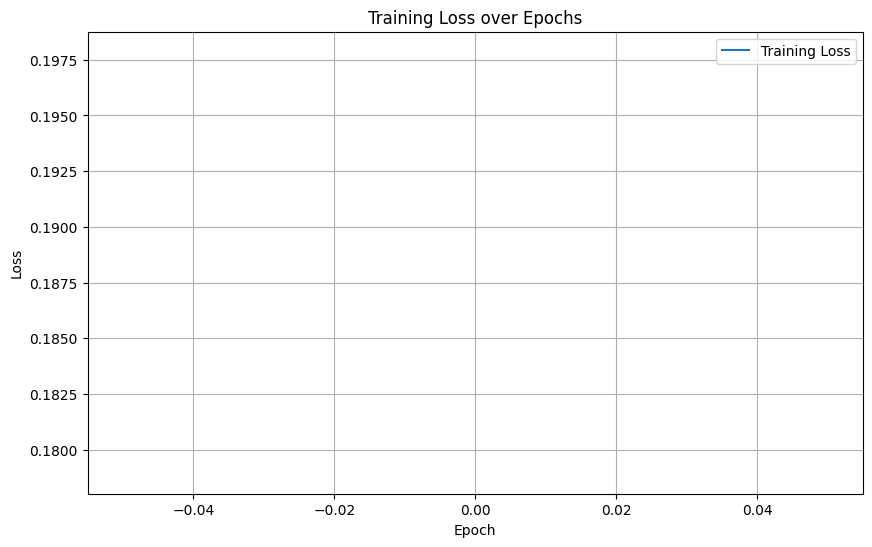

In [43]:
train_loss_history = trainer.logged_metrics['loss_epoch']

# Plotting the loss after training
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##Visualization:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation mean absolute error values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(['Train', 'Validation'])

plt.show()


In [ ]:
# Save the model
model.save('trained_model_HeatingANN.h5')

# Load the model (if needed)
loaded_model = tf.keras.models.load_model('trained_model_HeatingANN.h5')


In [23]:
# Make predictions
with torch.no_grad():
    y_pred = model(torch.Tensor(X_test)).numpy()

# Convert predictions and actual values to DataFrames for easier manipulation
predictions_df = pd.DataFrame(scaler_y.inverse_transform(y_pred), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test), columns=outputs)


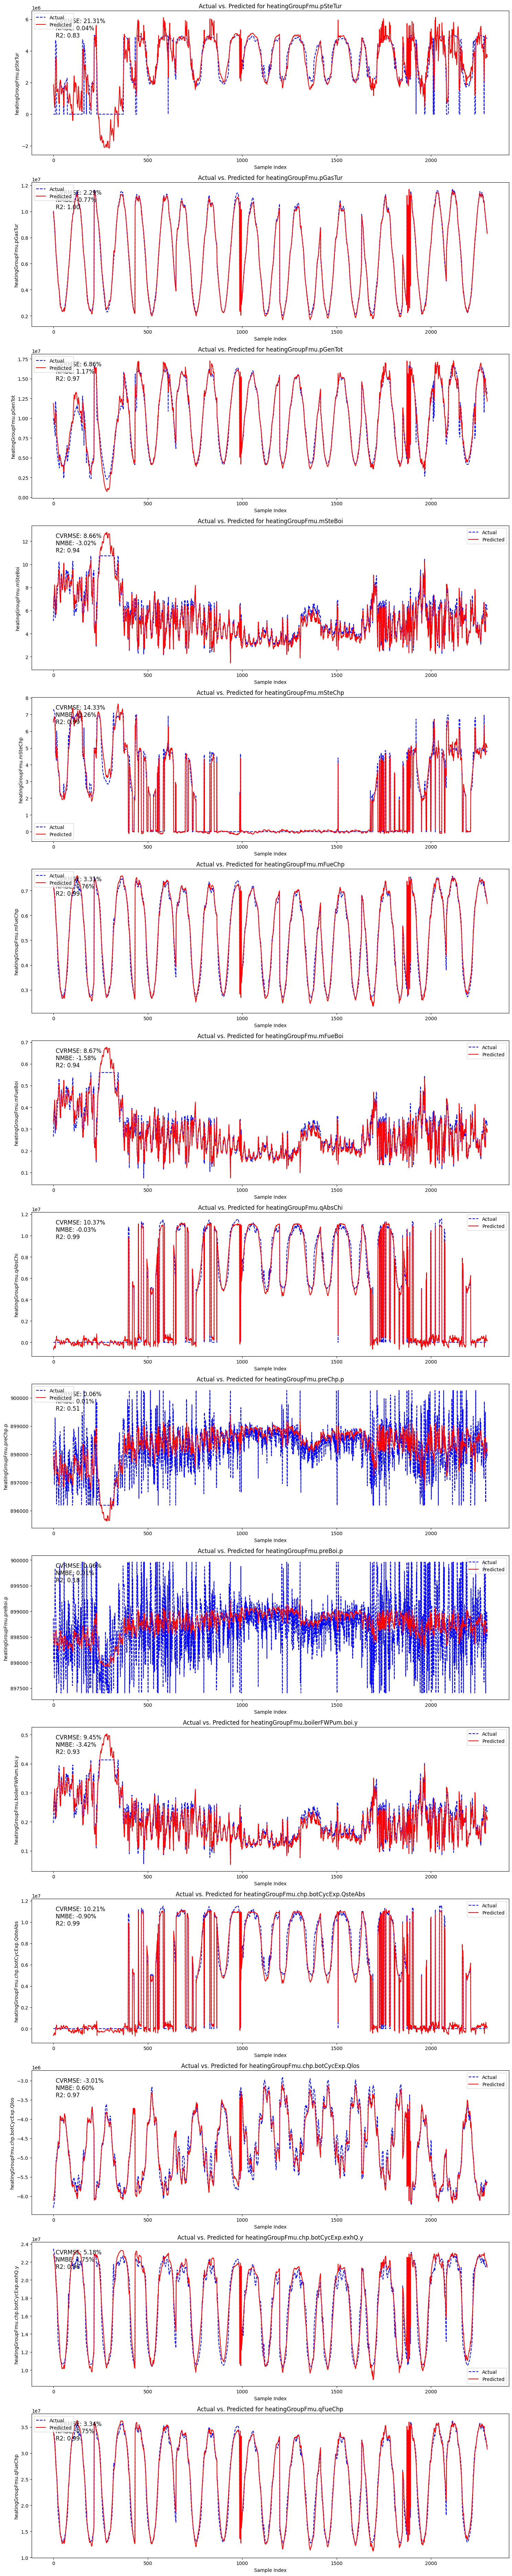

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actuals, predictions):
    metrics = {}
    for output in actuals.columns:
        actual_values = actuals[output]
        predicted_values = predictions[output]
        
        # Calculate metrics
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        mean_actual = np.mean(actual_values)
        
        # CVRMSE (Coefficient of Variation of RMSE)
        cvrmse = (rmse / mean_actual) * 100
        
        # NMBE (Normalized Mean Bias Error)
        nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
        
        # R2 (Coefficient of Determination)
        r2 = r2_score(actual_values, predicted_values)
        
        metrics[output] = {'CVRMSE': cvrmse, 'NMBE': nmbe, 'R2': r2}
    return metrics

def plot_actual_vs_predicted(actuals, predictions, output_names):
    metrics = calculate_metrics(actuals, predictions)
    
    num_outputs = len(output_names)
    plt.figure(figsize=(15, num_outputs * 5))
    
    for i, output in enumerate(output_names):
        plt.subplot(num_outputs, 1, i + 1)
        plt.plot(actuals.index, actuals[output], label='Actual', color='blue', linestyle='--')
        plt.plot(predictions.index, predictions[output], label='Predicted', color='red', linestyle='-')
        
        # Retrieve metrics for current output
        cvrmse = metrics[output]['CVRMSE']
        nmbe = metrics[output]['NMBE']
        r2 = metrics[output]['R2']
        
        # Print metrics on plot
        plt.title(f'Actual vs. Predicted for {output}')
        plt.xlabel('Sample Index')
        plt.ylabel(output)
        plt.legend()
        plt.text(0.05, 0.95, f'CVRMSE: {cvrmse:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'NMBE: {nmbe:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_actual_vs_predicted(actuals_df, predictions_df, outputs)


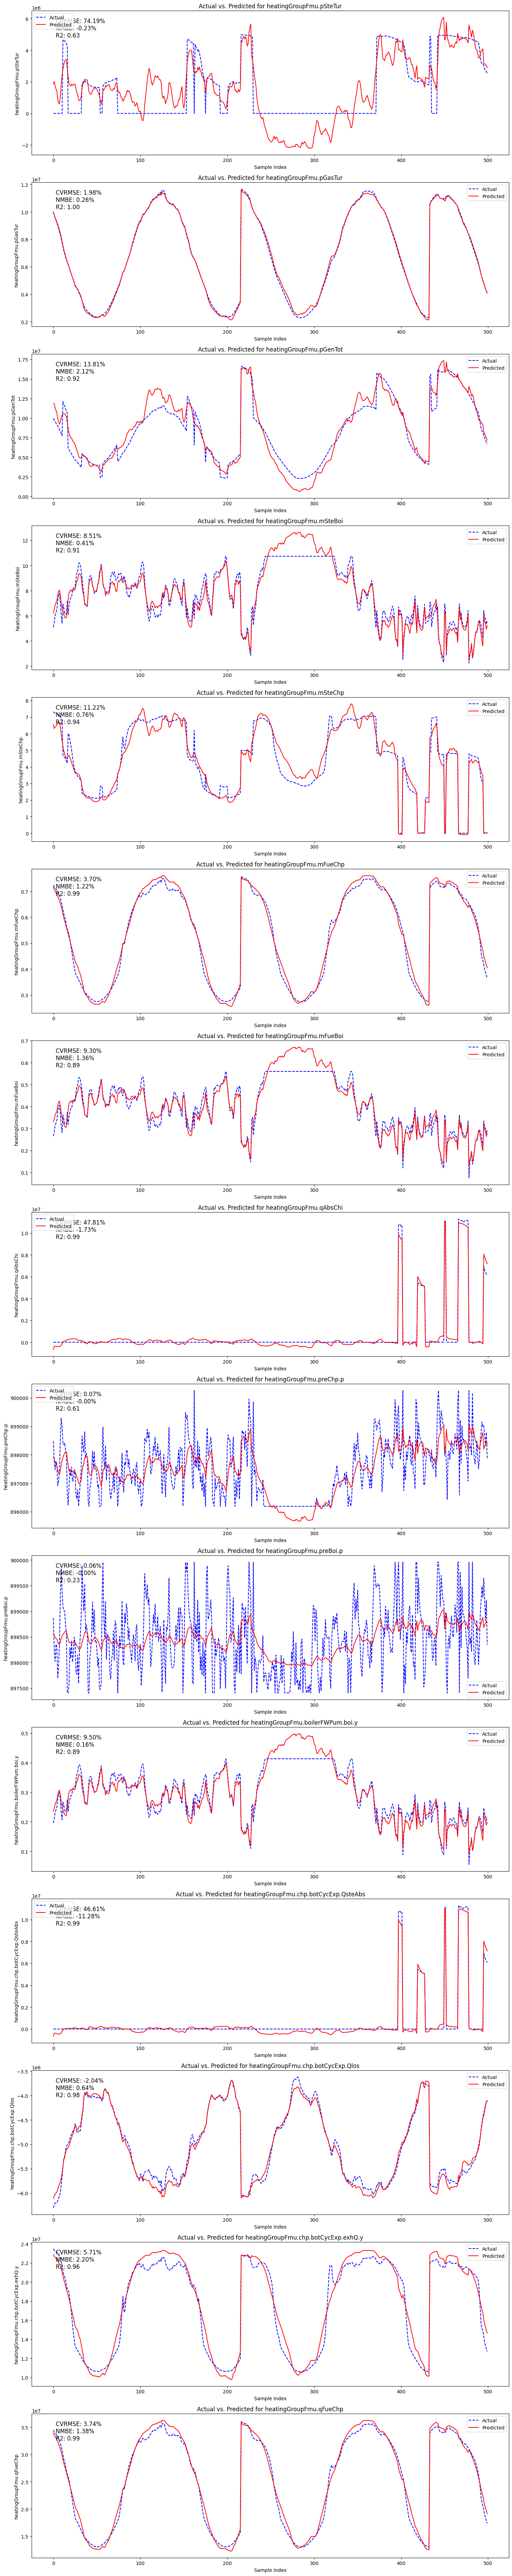

In [25]:
predictions = []

with torch.no_grad():
    prediction = model(torch.Tensor(X_test[0].reshape(1, -1))).numpy()
    predictions.append(prediction)
    for row_idx in range(1, 500):

        
        prediction = model(torch.Tensor(np.concatenate([X_test[row_idx][:6], prediction.reshape(-1, )]).reshape(1, -1))).numpy()
        predictions.append(prediction)

    predictions = np.array(predictions)
    predictions_df = pd.DataFrame(scaler_y.inverse_transform(predictions.reshape(-1, 15)), columns=outputs)
    actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test[:500]), columns=outputs)    
    plot_actual_vs_predicted(actuals_df, predictions_df, outputs)
